Himmelblau e sua função
========================================



## Introdução



Esse código encontra um valor de mínimo global para a função de Himmelblau. Como uma primeira análise, pode ser interessante analisar algebricamente essa função, da seguinte forma: $f(x,y)= (x² + y - 11)² + (x+ y²- 7)²$. Depois, vale levar em consideração a sua representação algébrica, que pode ser vista na imagem abaixo [1]

<p align="center"><img heigth= 440 width= 620 src="https://user-images.githubusercontent.com/106626661/230674678-4f9e6c5a-753a-4cc2-b7c4-6ef15230dc1b.png"></p>

No gráfico, podemos observar que a função possui quatro pontos mínimos, que estão localizados em (3, 2), (-2.805118, 3.131312), (-3.779310, -3.283186) e (3.584428, -1.848126) [2].
Logo, espera-se que nosso algoritmo genético retorne coordenadas próximas de algum desses pontos

## Objetivo



Sabendo dos diferentes pontos que podem ser encontrados para essa função, o objetivo da presente atividade consiste em encontrar, com auxílio de algoritmos genéticos, o ponto **MÍNIMO GLOBAL** para a função

## Importações



Todos os comandos de `import` devem estar dentro desta seção.



In [1]:
# Bibliotecas necessárias para rodar as células abaixo!
# Para  abusca aleatória:
import random
import matplotlib.pyplot as plt
from funcoes import populacao_fh
from funcoes import selecao_por_torneio_fh as funcao_selecao 
from funcoes import cruzamento_ponto_simples as funcao_cruzamento
from funcoes import mutacao_fh
from funcoes import funcao_objetivo_fh
from funcoes import funcao_objetivo_pop_fh as funcao_objetivo_pop

## Códigos e discussão



Para resolver esse problema por meio de algoritmos genéticos, é necessário pensar o que eu devo considerar como: Gene, Indivíduo, Função objetivo, Seleção, Mutação, Cruzamento e Critério de Parada.

Os `genes` serão valores de x e de y em um determinado intervalo de números. Logo, cada `ìndivíduo` é uma lista que contem apenas dois genes, cada um representando uma coordenada do ponto. O intervalo em que as coordenadas devem estar pode variar, mas, sabendo que os pontos mínimos de Himmelblau são (3, 2), (-2.805118, 3.131312), (-3.779310, -3.283186) e (3.584428, -1.848126) [1], é bom estabelecermos um domínio que não vá muito abaixo de -4 nem muito acima de 4, visto que nenhum mínimo será encontrado fora desses limites.

O que buscamos, nesse problema, é o ponto de menor valor da função em um determinado intervalo. Logo, a `função objetivo` deve retornar a projeção de cada ponto (indivíduo) na função $f(x,y)= (x² + y - 11)² + (x+ y²- 7)²$. Por fim, como é uma função de minimização, utilizaremos a mesma `seleção` utilizada no experimento 0.6 das senhas, assim como as mesmas funções de `mutação` e de `cruzamento`.

Por fim, o `critério de parada` pode ser simplesmente o número de gerações que estabelecemos como constante de busca, assim como estabelecemos em experimentos passados. No entanto, sabendo que o mínimo dessa função é 0, estabelecerei o critério como o "erro" máximo a ser aceito pelo código. Ou seja, se a resposta encontrada se aproximar o suficiente de 0, o código já poderá parar de rodar.


In [2]:
# constantes de busca
TAMANHO_POP = 12 # quantidade de indivíduos
NUM_GERACOES = 1000 # número de gerações
CHANCE_DE_COMPETIR_IND = 0.5 # chance que cada indivíduo tem de ser chamado para o torneio
CHANCE_CRUZAMENTO = 0.5 # chance de ocorrer o cruzamento entre dois indivíduos
CHANCE_MUTACAO = 0.02 # chance de ocorrer mutação em cada indivíduo durante cada geração
LIMITE_INFERIOR_DOMINIO = -10 # Menor valor possível para x ou y
LIMITE_SUPERIOR_DOMINIO = 10 # Maior valor possível para x ou y
PASSO = 0.00001 # intervalo entre cada elemento do domínio
DOMINIO=[]
incremento= 0.001
while LIMITE_INFERIOR_DOMINIO <= LIMITE_SUPERIOR_DOMINIO:
    # Adicionar o número à lista
    DOMINIO.append(LIMITE_INFERIOR_DOMINIO)
    # Incrementar o número pelo valor do incremento
    LIMITE_INFERIOR_DOMINIO += incremento
ERRO = 0.001 # erro aceito para o critério de parada

# constantes de problema
NUM_GENES = 2 # número de genes ou tamanho da senha
MINIMO = 0 # valor mínimo estimado para a função

In [3]:
# Funções Locais

def cria_populacao_inicial(tamanho, numero_genes):
    return populacao_fh(tamanho, numero_genes, DOMINIO)

def funcao_mutacao(individuo):
    return mutacao_fh(individuo, DOMINIO)

In [4]:
populacao = cria_populacao_inicial(TAMANHO_POP, NUM_GENES) # cria aleatoriamente uma população inicial

print('População inicial:') # mostra qual foi a população criada aleatoriamente
for i, ind in enumerate(populacao):
    print('Individuo ', i+1, ': ', ind)
    
melhor_fitness_ja_visto = float("inf")  # é assim que escrevemos infinito em python

#for _ in range(NUM_GERACOES): # loop que começa a rodar cada geração
while melhor_fitness_ja_visto >= (MINIMO + ERRO):
   
    # Única alteração na estrutura do código
    populacao = funcao_selecao(populacao, CHANCE_DE_COMPETIR_IND) # Tem a função de sortear individuos na população e troca-los pelo melhor entre eles
    
    pais = populacao[0::2] # definição dos indivíduos que serão pais
    maes = populacao[1::2] # definição dos indivíduos que serão mães
    contador = 0 # estratégia para colocar os filhos no lugar dos pais
    for pai, mae in zip(pais, maes): # laço de repetição para pegar itens da lista de pais e mães
        if random.random() < CHANCE_CRUZAMENTO: # aplicando a possibilidade de cruzamento
            # vai acertar o cruzamento
            filho1, filho2 = funcao_cruzamento(pai, mae) # "calculando" o filho 1 e o filho 2
            populacao[contador] = filho1 # trocando o pai pelo filho 1
            populacao[contador + 1] = filho2 # trocando a mãe pelo filho 2
            
        contador = contador + 2 # atualização do contador
    
    for n in range(len(populacao)): #laço de repetição para mutação
        if random.random() <= CHANCE_MUTACAO: # chance de mutação
            individuo = populacao[n] # esxolhe o indivíduo
            populacao[n] = funcao_mutacao(individuo) # muta o indivíduo
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    menor_fitness = min(fitness)
    if menor_fitness < melhor_fitness_ja_visto:        
        posicao = fitness.index(menor_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = menor_fitness
        
    
print()
print('População final:') # mostra qual foi a população final selecionada geneticamente
for i, ind in enumerate(populacao):
    print('Individuo ', i+1, ': ', ind, funcao_objetivo_fh(ind))
print(melhor_individuo_ja_visto)
print(melhor_fitness_ja_visto)

População inicial:
Individuo  1 :  [-1.9719999999999964, 0.9789999999998982]
Individuo  2 :  [0.9719999999998982, 5.41500000000004]
Individuo  3 :  [1.8369999999998061, -3.6609999999998104]
Individuo  4 :  [1.9809999999997903, 8.015000000000894]
Individuo  5 :  [4.6529999999997855, -9.33100000000037]
Individuo  6 :  [6.022000000000243, 0.4849999999998978]
Individuo  7 :  [8.327000000000721, 2.918999999999687]
Individuo  8 :  [1.202999999999876, 4.408999999999704]
Individuo  9 :  [3.116999999999665, -9.74800000000014]
Individuo  10 :  [3.4109999999996328, 3.8589999999995834]
Individuo  11 :  [4.593999999999766, -4.488999999999936]
Individuo  12 :  [-5.149000000000156, -2.7629999999999093]

População final:
Individuo  1 :  [2.9979999999996783, 1.9999999999997882] 0.00014790401605603066
Individuo  2 :  [2.9979999999996783, 2.009999999999787] 0.0014555940159188116
Individuo  3 :  [2.9979999999996783, 2.009999999999787] 0.0014555940159188116
Individuo  4 :  [2.9979999999996783, 2.0099999999

Uau!!! Como podemos ver na resposta acima, o código gerou um ponto bem próximo de (-3.779310, -3.283186), que é justamente um dos mínimos de Himmelblau. Se rodarmos outras vezes esse código, ele pode nos retornar novamente um resultado próximo a esse OU algum próximo a  (3.584428, -1.848126), (-2.805118, 3.131312) ou (3, 2), que são os outros 3 pontos mínimos.

##
### Analisando várias respostas do código

Agora, é válido analisar como esse algoritmo genético se comporta quando rodado várias vezes, isto é, verificar quais mínimos esse código retorna.

In [13]:
coordenadas= []
vezes_rodadas= 15 # Vamos rodar o código 40 vezes e ver como suas respostas se comportam, plotando-as num gráfico!
for _ in range (vezes_rodadas):
    populacao = cria_populacao_inicial(TAMANHO_POP, NUM_GENES) # cria aleatoriamente uma população inicial
    melhor_fitness_ja_visto = float("inf")  # é assim que escrevemos infinito em python

    while melhor_fitness_ja_visto >= (MINIMO + ERRO):
   
        # Única alteração na estrutura do código
        populacao = funcao_selecao(populacao, CHANCE_DE_COMPETIR_IND) # Tem a função de sortear individuos na população e troca-los pelo melhor entre eles
    
        pais = populacao[0::2] # definição dos indivíduos que serão pais
        maes = populacao[1::2] # definição dos indivíduos que serão mães
        contador = 0 # estratégia para colocar os filhos no lugar dos pais
        for pai, mae in zip(pais, maes): # laço de repetição para pegar itens da lista de pais e mães
            if random.random() < CHANCE_CRUZAMENTO: # aplicando a possibilidade de cruzamento
                # vai acertar o cruzamento
                filho1, filho2 = funcao_cruzamento(pai, mae) # "calculando" o filho 1 e o filho 2
                populacao[contador] = filho1 # trocando o pai pelo filho 1
                populacao[contador + 1] = filho2 # trocando a mãe pelo filho 2
            
            contador = contador + 2 # atualização do contador
    
        for n in range(len(populacao)): #laço de repetição para mutação
            if random.random() <= CHANCE_MUTACAO: # chance de mutação
                individuo = populacao[n] # esxolhe o indivíduo
                populacao[n] = funcao_mutacao(individuo) # muta o indivíduo
            
        # melhor individuo já visto até agora
        fitness = funcao_objetivo_pop(populacao)
        menor_fitness = min(fitness)
        if menor_fitness < melhor_fitness_ja_visto:        
            posicao = fitness.index(menor_fitness)
            melhor_individuo_ja_visto = populacao[posicao]
            melhor_fitness_ja_visto = menor_fitness
    coordenadas.append(melhor_individuo_ja_visto) # todas as 40 respostas serão armazenadas nessa lista


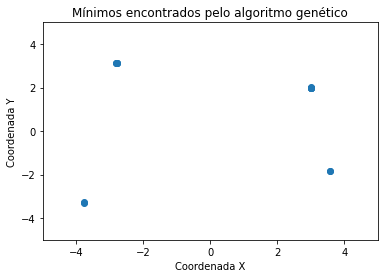

In [14]:
# tendo armazenado as respostas na lista "coordenadas", vamos plotá-las num gráfico
x = [coord[0] for coord in coordenadas]
y = [coord[1] for coord in coordenadas]
plt.scatter(x, y)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title('Mínimos encontrados pelo algoritmo genético')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Exibe o gráfico
plt.show()

Yay!!! Rodando o algoritmo genético 40 vezes, ele encontrou todas os 4 mínimos da função de Himmelblau, que coincidem, inclusive, com os mínimos do gráfico presente na Introdução do Notebook.

## Conclusão



Rodando o código que retorna apenas uma resposta, percebe-se que, no intervalo estabelecido (-6 a 6, com passo de 0.01), essa resposta pode variar entre os quatro mínimos da função de Himmelblau. Essa variação ratifica a observação feita nas conclusões do experimento A 0.3 [3] de que os algoritmos genéticos são, de fato, probabilísticos. Afinal, eles dependem de muitos parâmetros aleatórios em variadas etapas do seu processo, desde a definição da população inicial, até quais genes serão mutados e quais indivíduos serão cruzados.

Entretanto, apesar dessa natureza probabilística, ao analisarmos as respostas que o algoritmo retorna ao ser rodado 40 vezes, percebemos que elas são muito próximas do resultado considerado "correto". Isso se deve ao critério de parada estabelecido, que determina que nenhuma resposta deve se desviar mais de 0.01 da resposta correta.


## Referências consultadas



1.  https://en.wikipedia.org/wiki/Himmelblau%27s_function

2.  https://github.com/benetao/Redes_Neurais_Isabela_Beneti/blob/main/AlgoritmosGeneticos/experimento%20A.05%20-%20descobrindo%20a%20senha.ipynb

3. https://github.com/benetao/Redes_Neurais_Isabela_Beneti/blob/main/AlgoritmosGeneticos/experimento%20A.03%20-%20algoritmo%20genetico.ipynb



## Playground

